In [1]:
import os
import cv2
import glob
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt

C:\Users\Gilberto\Anaconda3\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [4]:
files = glob.glob('../data/Training/*.nii')
files

['../data/Training\\BraTS20_Training_001_seg.nii',
 '../data/Training\\BraTS20_Training_002_seg.nii',
 '../data/Training\\BraTS20_Training_003_seg.nii',
 '../data/Training\\BraTS20_Training_004_seg.nii',
 '../data/Training\\BraTS20_Training_005_seg.nii',
 '../data/Training\\BraTS20_Training_006_seg.nii',
 '../data/Training\\BraTS20_Training_007_seg.nii',
 '../data/Training\\BraTS20_Training_008_seg.nii',
 '../data/Training\\BraTS20_Training_009_seg.nii',
 '../data/Training\\BraTS20_Training_010_seg.nii',
 '../data/Training\\BraTS20_Training_011_seg.nii',
 '../data/Training\\BraTS20_Training_012_seg.nii',
 '../data/Training\\BraTS20_Training_013_seg.nii',
 '../data/Training\\BraTS20_Training_014_seg.nii',
 '../data/Training\\BraTS20_Training_015_seg.nii',
 '../data/Training\\BraTS20_Training_016_seg.nii',
 '../data/Training\\BraTS20_Training_017_seg.nii',
 '../data/Training\\BraTS20_Training_018_seg.nii',
 '../data/Training\\BraTS20_Training_019_seg.nii',
 '../data/Training\\BraTS20_Tra

In [15]:
def mask_size_for_slice(path, i_slice):
    totals = dict([(1, 0), (2, 0), (3, 0)])
    image_volume=nib.load(path).get_fdata()
    # flatten 3D image into 1D array and convert mask 4 to 2
    arr = image_volume[:,:,i_slice].flatten()
    arr[arr == 4] = 3

    unique, counts = np.unique(arr, return_counts=True)
    unique = unique.astype(int)
    values_dict=dict(zip(unique, counts))

    for k in range(1,4):
        totals[k] += values_dict.get(k,0)
    return totals

count class 1: 287
{1: 287, 2: 3843, 3: 631}


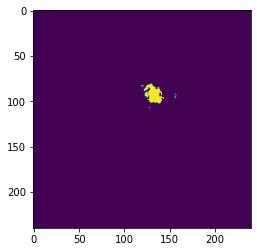

In [16]:
loc_slice = 73
loc_class=1

seg_sum = mask_size_for_slice('../data/Training/001/BraTS20_Training_001_seg.nii', loc_slice)


image_volume = nib.load('../data/Training/001/BraTS20_Training_001_seg.nii').get_fdata()
image_loc = image_volume[:, :, loc_slice]
image_loc[image_loc != loc_class] = 0

# plot segment only for class 'my_loc_class'
plt.imshow(image_loc)

image_loc=image_loc.flatten()
count = np.count_nonzero(image_loc == loc_class)

print(f'count class {loc_class}: {count}')
print(seg_sum)

In [17]:
def read_nii_file(nii_file):
    img = nib.load(nii_file)
    img_fdata = img.get_fdata()
    return img_fdata

In [20]:
import imageio


def save_img(file, save_dir):
    fdata = read_nii_file(file)
    (x, y, z) = fdata.shape
    
    for k in range(z):
        slice = fdata[k, :, :]
        imageio.imwrite(os.path.join(save_dir, '{}.png'.format(k)), slice)

In [22]:
save_img('../data/Training/001/BraTS20_Training_001_seg.nii', '../data/Outdir')

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0.0, 4.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 4.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 4.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 4.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 4.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 4.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 4.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 4.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion

Lossy conversion from float64 to uint8. Range [0.0, 2.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 2.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 2.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 2.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 2.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 2.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 2.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 2.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion